In [1]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
%matplotlib inline
import matplotlib.pyplot as plt


loading MHR


/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Python/2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
dfBooks = pd.read_csv('data/book_sample.csv.gz').dropna()

dfElectronics = pd.read_csv('data/eletronic_sample_counts.csv.gz').dropna()


/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (10,11,17,19,20,21,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#len(pd.read_csv('data/book_sample.csv.gz'))

In [ ]:
eletronic_a=[]
eletronic_b=[]
eletronic_dinamic_t_a=[]
eletronic_dinamic_t_b=[]
eletronic_a_std=[]
eletronic_dinamic_t_a_std=[]
book_a_std=[]
book_dinamic_t_a_std=[]

n_itens=1000
book_a = []
book_dinamic_t_a =[]
for i in np.arange(0.5,1.05,0.05):
    print "limiar="+str(i)
    
    #eletronic a
    df,ndcg_mhr = mhr.executeFromDf(dfElectronics,0.893,i+1)
    eletronic_a.append(np.mean(ndcg_mhr))
    eletronic_a_std.append(np.std(ndcg_mhr))
    
    df,ndcg_mhr = mhr.executeFromDf(dfElectronics,0.893,i-1)
    eletronic_dinamic_t_a.append(np.mean(ndcg_mhr))
    eletronic_dinamic_t_a_std.append(np.std(ndcg_mhr))
    
    
    
    
    #books
    df,ndcg_mhr = mhr.executeFromDf(dfBooks,0.893,i+1)
    book_a.append(np.mean(ndcg_mhr))
    book_a_std.append(np.std(ndcg_mhr))
    
    df,ndcg_mhr = mhr.executeFromDf(dfBooks,0.893,i-1)
    book_dinamic_t_a.append(np.mean(ndcg_mhr))
    book_dinamic_t_a_std.append(np.std(ndcg_mhr))

#     for j in xrange(11):
#         print " node="+str(j) + " degree="+ str(len(np.where(matrix[np.ix_(selected_nodes, selected_nodes)][j]>=i)[0])) + " real_helpfulness="+str(values_test[j])

limiar=0.5
product=1400532655 ndcg=0.702702411858 (0.702702411858)
product=B00000J061 ndcg=0.750515574414 (0.798328736971)
product=B00001P4ZH ndcg=0.738508260231 (0.714493631865)
product=B00001WRSJ ndcg=0.670502477473 (0.466485129196)
product=B000031KIM ndcg=0.732447304032 (0.980226610269)
product=B00004SB92 ndcg=0.75890854959 (0.891214777384)
product=B00004THCZ ndcg=0.778363936983 (0.895096261336)
product=B00004XOM3 ndcg=0.771752679239 (0.725473875038)
product=B00004ZCJE ndcg=0.770112948408 (0.756995101752)
product=B000053HC5 ndcg=0.780477625008 (0.873759714411)
product=B000053HH5 ndcg=0.784254902729 (0.822027679937)
product=B00005LEN4 ndcg=0.788068940999 (0.830023361975)
product=B000062VUO ndcg=0.793342196792 (0.856621266302)
product=B00006B7DA ndcg=0.791456630176 (0.766944264173)
product=B00006HMPK ndcg=0.800002271893 (0.919641255923)
product=B00006I53S ndcg=0.799327197584 (0.789201082958)
product=B00006I53X ndcg=0.799344343327 (0.799618675208)
product=B00006IS4X ndcg=0.804920288444

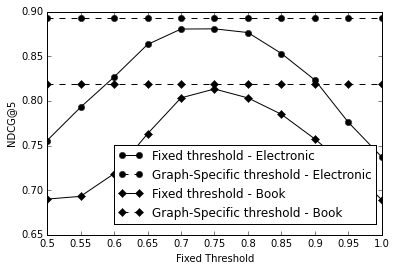

In [12]:
books_base=np.full(11, 0.81876)
electro_base=np.full(11, 0.89246)
def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=11
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[5:len(y)-5]

#eletronic_dinamic_t_a

plt.plot(eletronic_a,  marker='o', c='k',label="Fixed threshold - Electronic")
#plt.errorbar(np.argmax(eletronic_a), eletronic_a[np.argmax(eletronic_a)],  c='k',yerr=eletronic_a_std[np.argmax(eletronic_a)], fmt='o')

plt.plot(electro_base ,marker='o', c='k',linestyle='--',label="Graph-Specific threshold - Electronic")
#plt.errorbar(np.argmax(eletronic_dinamic_t_a), eletronic_dinamic_t_a[np.argmax(eletronic_dinamic_t_a)], c='k', yerr=eletronic_dinamic_t_a_std[np.argmax(eletronic_dinamic_t_a)], fmt='o')


##BOOK
plt.plot(book_a ,marker='D', c='k',label="Fixed threshold - Book")
#plt.errorbar(np.argmax(book_a), book_a[np.argmax(book_a)],  c='k',yerr=book_a_std[np.argmax(book_a)], fmt='D')


plt.plot(books_base ,marker='D', c='k',linestyle='--',label="Graph-Specific threshold - Book")
#ebb=plt.errorbar(np.argmax(book_dinamic_t_a), book_dinamic_t_a[np.argmax(book_dinamic_t_a)], c='k',yerr=book_dinamic_t_a_std[np.argmax(book_dinamic_t_a)], fmt='D')
#ebb[-1][0].set_linestyle('--')


plt.legend(bbox_to_anchor=(1.0, 0.43))
plt.xticks( np.arange(0,11,1), np.arange(0.5,1.05,0.05))
plt.xlabel('Fixed Threshold')
plt.ylabel('NDCG@5')

#plt.xticks(np.arange(min(eletronic_a), max(eletronic_a), 1.0))

plt.show( )


In [10]:
print "BOOKS best fixed T="+str(np.arange(0.5,1.05,0.05)[np.argmax(book_a)])+" ndcg= "+ str(book_a[np.argmax(book_a)])

print "ELECT best fixed T="+str(np.arange(0.5,1.05,0.05)[np.argmax(eletronic_a)])+" ndcg= "+ str(eletronic_a[np.argmax(eletronic_a)])


ind=np.argmax(book_a)
print "std of books= "+ str(eletronic_a_std[np.argmax(eletronic_a)])
print "std of books= "+ str(book_a_std[np.argmax(book_a)])





BOOKS best fixed T=0.75 ndcg= 0.813324698839
ELECT best fixed T=0.75 ndcg= 0.880690771563
std of books= 0.0902900276884
std of books= 0.101527824387


In [ ]:
eletronic_a=[]
eletronic_b=[]

eletronic_dinamic_t_a=[]


book_dinamic_t_a_std=[]

n_itens=1000
book_a = []
book_b = []
book_dinamic_t_a =[]
for i in np.arange(0.5,1.01,0.1):
    print "limiar="+str(i)
    
    #eletronic
    df,ndcg_mhr = mhr.executeFromDf(dfElectronics,i,-0.12)
    eletronic_a.append(np.mean(ndcg_mhr))
    
    df,ndcg_mhr = mhr.executeFromDf(dfElectronics,0.893,i-1)
    eletronic_b.append(np.mean(ndcg_mhr))
    
    
    
    
    
    #books
    df,ndcg_mhr = mhr.executeFromDf(dfBooks,i,-0.12)
    book_a.append(np.mean(ndcg_mhr))
    
    df,ndcg_mhr = mhr.executeFromDf(dfBooks,0.893,i-1)
    book_b.append(np.mean(ndcg_mhr))
    




limiar=0.5
product=1400532655 ndcg=0.92824710729 (0.92824710729)
product=B00000J061 ndcg=0.953874444865 (0.979501782441)
product=B00001P4ZH ndcg=0.951017781828 (0.945304455754)
product=B00001WRSJ ndcg=0.935646801139 (0.88953385907)
product=B000031KIM ndcg=0.946036989631 (0.9875977436)
product=B00004SB92 ndcg=0.94152302752 (0.918953216965)
product=B00004THCZ ndcg=0.942810542504 (0.950535632411)
product=B00004XOM3 ndcg=0.943712034353 (0.950022477297)
product=B00004ZCJE ndcg=0.938985489934 (0.901173134577)
product=B000053HC5 ndcg=0.931347288791 (0.86260347851)
product=B000053HH5 ndcg=0.936018028773 (0.982725428585)
product=B00005LEN4 ndcg=0.930098678946 (0.864985830854)
product=B000062VUO ndcg=0.919967533077 (0.798393782653)
product=B00006B7DA ndcg=0.924036589979 (0.976934329693)
product=B00006HMPK ndcg=0.926124896274 (0.955361184408)
product=B00006I53S ndcg=0.929086629698 (0.973512631063)
product=B00006I53X ndcg=0.923993146122 (0.842497408898)
product=B00006IS4X ndcg=0.922745485969 (0.90

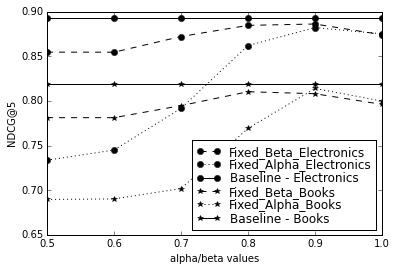

In [144]:
books_base=np.full(6, 0.81876)
electro_base=np.full(6, 0.89246)
def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=11
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[5:len(y)-5]

#eletronic_dinamic_t_a

plt.plot(eletronic_a,  marker='o', c='k',linestyle='--',label="Fixed_Beta_Electronics" )

plt.plot(eletronic_b,  marker='o', c='k',linestyle='dotted',label="Fixed_Alpha_Electronics")


plt.plot(electro_base ,marker='o', c='k',label="Baseline - Electronics")


##BOOK"c) Fixed Beta - Book"
plt.plot(book_a ,marker='*', c='k',linestyle='--',label="Fixed_Beta_Books" )

plt.plot(book_b ,marker='*', c='k',linestyle='dotted',label="Fixed_Alpha_Books")


plt.plot(books_base ,marker='*', c='k',label= "Baseline - Books")



plt.legend(bbox_to_anchor=(1.0, 0.45), labelspacing=0.03,markerscale=1)
plt.xticks( np.arange(0,6,1), np.arange(0.5,1.1,0.1))
plt.xlabel('alpha/beta values')
plt.ylabel('NDCG@5')

#plt.xticks(np.arange(min(eletronic_a), max(eletronic_a), 1.0))

plt.show( )


In [148]:
print "beta eletronic"
print "referencia=" + str(np.max(electro_base))
print "minimo=" + str(np.min(eletronic_b))
print "variacao max%=" + str(1- (np.min(eletronic_b)/float(np.max(electro_base))))
print "variacao min%=" + str(1- (np.max(eletronic_b)/float(np.max(electro_base))))
print "variacao>8 %=" + str(1- (eletronic_b[3]/float(np.max(electro_base))))
print "b@0.8=" + str(eletronic_b[3])
print "b@0.9=" + str(eletronic_b[4])
print "b@1=" + str(eletronic_b[5])

print "--"

print "alpa eletronic"
print "referencia=" + str(np.max(electro_base))
print "minimo=" + str(np.min(eletronic_a))
print "variacao max%=" + str(1- (np.min(eletronic_a)/float(np.max(electro_base))))
print "variacao min%=" + str(1- (np.max(eletronic_a)/float(np.max(electro_base))))

print "--"

print "beta book"
print "referencia=" + str(np.max(books_base))
print "minimo=" + str(np.min(book_b))
print "variacao max%=" + str(1- (np.min(book_b)/float(np.max(books_base))))
print "variacao min%=" + str(1- (np.max(book_b)/float(np.max(books_base))))
print "variacao>8 %=" + str(1- (book_b[3]/float(np.max(books_base))))
print "b@0.8= " + str(book_b[3])
print "b@0.9= " + str(book_b[4])
print "b@1= " + str(book_b[5])

print "--"

print "alfa book"
print "referencia=" + str(np.max(books_base))
print "minimo=" + str(np.min(book_a))
print "variacao max %=" + str(1- (np.min(book_a)/float(np.max(books_base))))
print "variacao min %=" + str(1- (np.max(book_a)/float(np.max(books_base))))


beta eletronic
referencia=0.89246
minimo=0.73356645373
variacao max%=0.178039963998
variacao min%=0.0115829419286
variacao>8 %=0.0342225226696
b@0.8=0.861917767418
b@0.9=0.882122687646
b@1=0.875107369451
--
alpa eletronic
referencia=0.89246
minimo=0.854531206411
variacao max%=0.0424991524425
variacao min%=0.00710664818547
--
beta book
referencia=0.81876
minimo=0.689596841227
variacao max%=0.157754603025
variacao min%=0.00595333605509
variacao>8 %=0.0605866656007
b@0.8= 0.769154061673
b@0.9= 0.813885646572
b@1= 0.799842731983
--
alfa book
referencia=0.81876
minimo=0.781178792826
variacao max %=0.0459001504392
variacao min %=0.0104135081723
